<a href="https://colab.research.google.com/github/ran2710p/Inventory-Data-Analysis-Python/blob/main/Inventory_Analysis_case_study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Liabraries**

In [97]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from wordcloud import WordCloud , STOPWORDS



**Warning Handling**

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Data Collection**

In [6]:
PurchasePrice = pd.read_csv('/content/2017PurchasePricesDec.csv') #purchase price of each product


In [34]:
BegInv = pd.read_csv('/content/BegInvFINAL12312016.csv') #Begining inventory of each product

In [35]:
EndInv = pd.read_csv('/content/EndInvFINAL12312016.csv') #Ending inventory

In [36]:
Purchases = pd.read_csv('/content/InvoicePurchases12312016.csv') # Purchase Quantity of each product

In [37]:
PurchaseFinal = pd.read_csv('/content/PurchasesFINAL12312016.csv')

In [38]:
SalesFinal = pd.read_csv('/content/SalesFINAL12312016.csv')

# **Initial Exploration**

# 1.Purchase Price Analysis

In [39]:
#Display the first few rows of the purchase price
PurchasePrice.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [40]:
#Data type and null counts
PurchasePrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12260 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12260 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12260 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12260 non-null  int64  
 6   PurchasePrice   12260 non-null  float64
 7   VendorNumber    12260 non-null  int64  
 8   VendorName      12260 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 957.8+ KB


In [41]:
#districtive statistics in the purchase price
PurchasePrice.describe().T

,count,mean,std,min,25%,50%,75%,max
Brand,12260.0,17990.191680,12528.395592,58.0,5991.50,18789.000,25117.25,90631.00
Price,12260.0,38.643392,206.159284,0.0,10.99,15.990,29.99,13999.90
Classification,12260.0,1.709054,0.454217,1.0,1.00,2.000,2.00,2.00
PurchasePrice,12260.0,26.489467,156.189257,0.0,6.89,10.645,20.13,11111.03
VendorNumber,12260.0,10815.704731,19008.228360,2.0,3960.00,7153.000,9552.00,173357.00


In [42]:
#COUNT The number of null values in each coulmn of purchase price
PurchasePrice.isnull().sum()

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [43]:
#Number of rows and columns of purchase price
PurchasePrice.shape

(12260, 9)

In [44]:
#Check for null values in descriptive column
PurchasePrice[PurchasePrice['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName


In [45]:
#Dropping null values in the Purchase Price
PurchasePrice.dropna(inplace=True)

In [46]:
#Calculate correlation between numeric column in PurchasePrice
PurchasePrice.corr()

,Brand,Price,Classification,PurchasePrice,VendorNumber
Brand,1.000000,-0.035824,0.733686,-0.043301,0.062648
Price,-0.035824,1.000000,-0.047130,0.997658,-0.014470
Classification,0.733686,-0.047130,1.000000,-0.056458,0.093307
PurchasePrice,-0.043301,0.997658,-0.056458,1.000000,-0.014135
VendorNumber,0.062648,-0.014470,0.093307,-0.014135,1.000000


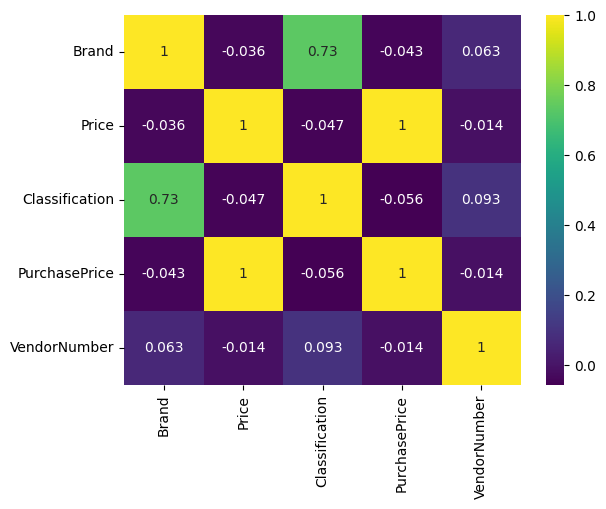

In [47]:
#heatmap to visualize correlation matrix using seaborn
sns.heatmap(PurchasePrice.corr(),cmap='viridis', annot=True)
plt.show()

# Inventory Analysis

In [48]:
#First few rows of 'BegInv'
BegInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [49]:
#information of 'BegInfo' including data tyoe and null vales
BegInv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [50]:
#descriptive statistics for the DataFrame "BegInv" and transpose the result for readability
BegInv.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,206529.0,42.122457,23.191393,1.0,22.00,42.00,64.00,79.0
Brand,206529.0,13761.482320,13059.429355,58.0,3746.00,8010.00,22143.00,90090.0
onHand,206529.0,20.429455,31.467342,0.0,7.00,12.00,21.00,1251.0
Price,206529.0,22.253910,70.178964,0.0,9.99,14.99,21.99,13999.9


In [51]:
#shape (number of rows and columns) of the DataFrame "BegInv"
BegInv.shape

(206529, 9)

In [52]:
#number of missing (null) values in each column of 'BegInv'
BegInv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [53]:
#correlation matrix for the numeric column of 'BegInv'
BegInv.corr()

,Store,Brand,onHand,Price
Store,1.000000,0.039331,0.077987,0.030347
Brand,0.039331,1.000000,-0.033851,-0.042091
onHand,0.077987,-0.033851,1.000000,-0.056660
Price,0.030347,-0.042091,-0.056660,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

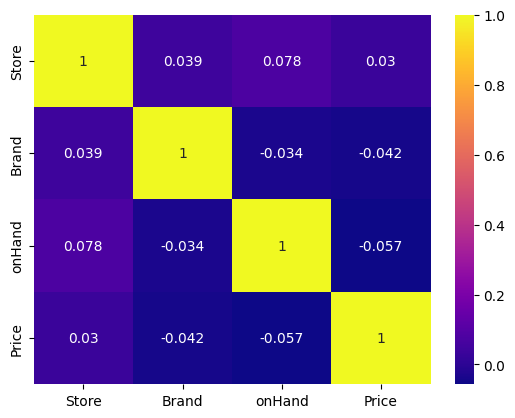

In [54]:
#heatmap visualization of the correlation matrix, using Seaborn
sns.heatmap(BegInv.corr(), cmap='plasma', annot=True)
plt.show

# Ending Inventory Analysis

In [55]:
#first few rows of the 'EndInv
EndInv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [56]:
#information about the 'EndInv' DataFrame, including data types and non-null values
EndInv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [57]:
#summary of descriptive statistics for the 'EndInv'
EndInv.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,224489.0,43.505740,23.326415,1.00,23.00,44.00,66.00,81.0
Brand,224489.0,14356.370513,13118.467851,58.00,3798.00,8259.00,23965.00,90631.0
onHand,224489.0,21.763988,37.233576,0.00,7.00,12.00,22.00,3676.0
Price,224489.0,23.585583,79.202775,0.49,9.99,14.99,23.49,13999.9


In [58]:
#shape of the 'EndInv' DataFrame, which returns the number of rows and columns
EndInv.shape

(224489, 9)

In [59]:
#Check for missing (NaN) values in the 'EndInv' & count of missing values for each column
EndInv.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [60]:
# Create a new DataFrame by dropping the 'City' column from 'EndInv'
EndInv.drop('City', axis=1).head()

,InventoryId,Store,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [61]:
#Compute the correlation matrix for the 'EndInv'
EndInv.corr()

,Store,Brand,onHand,Price
Store,1.000000,0.050018,0.054414,0.031032
Brand,0.050018,1.000000,-0.059422,-0.042231
onHand,0.054414,-0.059422,1.000000,-0.053668
Price,0.031032,-0.042231,-0.053668,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

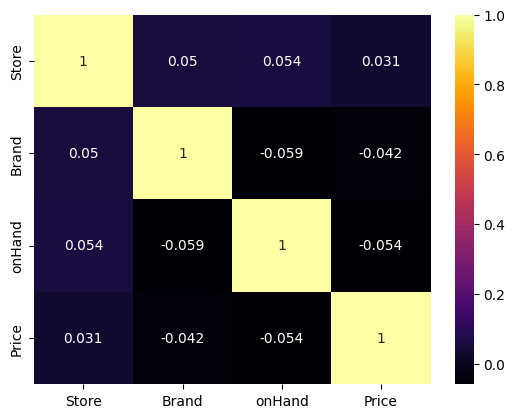

In [62]:
#Create a heatmap of the correlation matrix for 'EndInv'
sns.heatmap(EndInv.corr(), cmap='inferno', annot=True)
plt.show

# Purchase Analysis

In [67]:
#Create a new column 'Total Amount' by summing 'Dollars' and 'Freight' columns
Purchases['Total Amount'] = Purchases['Dollars'] + Purchases['Freight']
Purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Total Amount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None,149.12
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None,111.21
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None,140418.98
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None,15956.45


In [68]:
#data types and non-null counts
Purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
 10  Total Amount  5543 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 476.5+ KB


In [69]:
#summary statistics
Purchases.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,5543.0,20662.752120,34582.158410,2.00,3089.00,7240.00,10754.000,201359.00
PONumber,5543.0,10889.419087,1600.859969,8106.00,9503.50,10890.00,12275.500,13661.00
Quantity,5543.0,6058.880931,14453.338164,1.00,83.00,423.00,5100.500,141660.00
Dollars,5543.0,58073.383642,140234.031377,4.14,967.81,4765.45,44587.175,1660435.88
Freight,5543.0,295.954301,713.585093,0.02,5.02,24.73,229.660,8468.22
Total Amount,5543.0,58369.337943,140937.066515,4.16,972.41,4790.71,44794.505,1668904.10


In [72]:
# Retrieve the shape
Purchases.shape

(5543, 11)

In [73]:
# Check for missing values in each column and sum them up
Purchases.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
Total Amount    0
dtype: int64

In [74]:
#correlation matrix for the columns in the 'Purchases
Purchases.corr()

,VendorNumber,PONumber,Quantity,Dollars,Freight,Total Amount
VendorNumber,1.000000,0.014151,-0.168329,-0.163386,-0.163493,-0.163398
PONumber,0.014151,1.000000,0.049230,0.058917,0.043617,0.058844
Quantity,-0.168329,0.049230,1.000000,0.963831,0.946550,0.963815
Dollars,-0.163386,0.058917,0.963831,1.000000,0.985141,1.000000
Freight,-0.163493,0.043617,0.946550,0.985141,1.000000,0.985290
Total Amount,-0.163398,0.058844,0.963815,1.000000,0.985290,1.000000


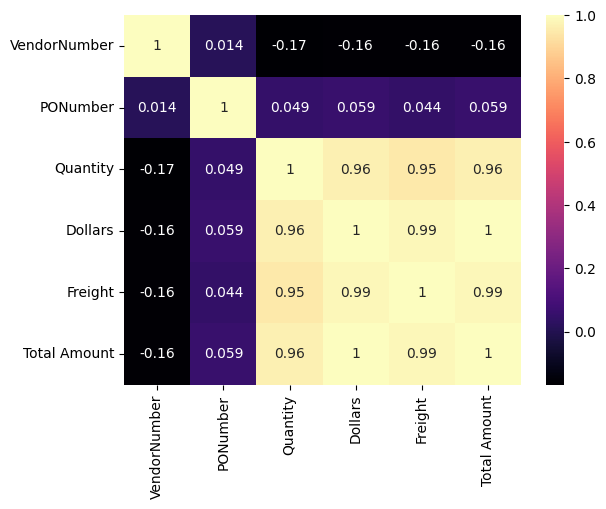

In [75]:
#heatmap to visualize the correlations between different columns in the 'Purchases
sns.heatmap(Purchases.corr(), cmap='magma', annot=True)
plt.show()

# **5. Final Purchase Analysis**

In [76]:
PurchaseFinal.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105.0,ALTAMAR BRANDS LLC,8124.0,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466.0,AMERICAN VINTAGE BEVERAGE,8137.0,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388.0,ATLANTIC IMPORTING COMPANY,8169.0,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5.0,106.60,1.0


In [77]:
#check for null values
PurchaseFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105723 entries, 0 to 105722
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     105723 non-null  object 
 1   Store           105723 non-null  int64  
 2   Brand           105723 non-null  int64  
 3   Description     105723 non-null  object 
 4   Size            105723 non-null  object 
 5   VendorNumber    105722 non-null  float64
 6   VendorName      105722 non-null  object 
 7   PONumber        105722 non-null  float64
 8   PODate          105722 non-null  object 
 9   ReceivingDate   105722 non-null  object 
 10  InvoiceDate     105722 non-null  object 
 11  PayDate         105722 non-null  object 
 12  PurchasePrice   105722 non-null  float64
 13  Quantity        105722 non-null  float64
 14  Dollars         105722 non-null  float64
 15  Classification  105722 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usage: 12.9+ M

In [78]:
#summary statistics
PurchaseFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,105723.0,42.891878,23.761123,1.00,23.00,44.00,66.00,79.00
Brand,105723.0,12386.581718,12642.889604,58.00,3637.00,6329.00,18857.00,47090.00
VendorNumber,105722.0,6815.196752,8075.437951,105.00,3252.00,4425.00,9552.00,173357.00
PONumber,105722.0,8314.926855,89.632907,8106.00,8252.00,8309.00,8396.00,8489.00
PurchasePrice,105722.0,11.557465,9.999023,0.38,6.12,8.98,13.99,338.34
Quantity,105722.0,14.257524,22.115689,1.00,6.00,11.00,12.00,1080.00
Dollars,105722.0,131.934680,233.148582,0.38,50.28,84.30,138.42,15303.60
Classification,105722.0,1.437676,0.496103,1.00,1.00,1.00,2.00,2.00


In [80]:
# shape
PurchaseFinal.shape

(105723, 16)

In [81]:
#Count the number of missing null
PurchaseFinal.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      1
VendorName        1
PONumber          1
PODate            1
ReceivingDate     1
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

In [85]:
#check for 'Size' column is null (missing values)
PurchaseFinal[PurchaseFinal['Size'].isnull()]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification


In [86]:
#Remove rows with missing values (NaN)
PurchaseFinal.dropna(inplace=True)

In [87]:
#correlation between columns
PurchaseFinal.corr()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
Store,1.000000,0.038678,0.000346,0.042349,0.035433,-0.000858,0.022457,0.038090
Brand,0.038678,1.000000,-0.001628,0.000436,-0.220836,-0.046882,-0.088463,0.744807
VendorNumber,0.000346,-0.001628,1.000000,-0.021786,0.038226,-0.003202,0.010848,-0.032922
PONumber,0.042349,0.000436,-0.021786,1.000000,-0.019779,-0.041287,-0.078237,-0.000409
PurchasePrice,0.035433,-0.220836,0.038226,-0.019779,1.000000,-0.148536,0.292281,-0.287307
Quantity,-0.000858,-0.046882,-0.003202,-0.041287,-0.148536,1.000000,0.603108,-0.075971
Dollars,0.022457,-0.088463,0.010848,-0.078237,0.292281,0.603108,1.000000,-0.120861
Classification,0.038090,0.744807,-0.032922,-0.000409,-0.287307,-0.075971,-0.120861,1.000000


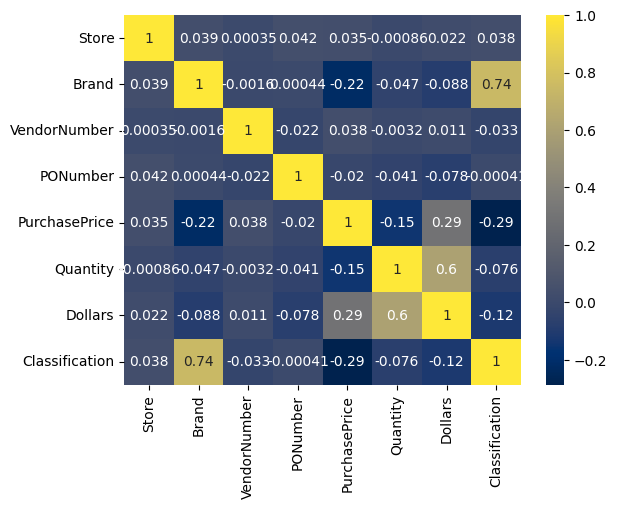

In [88]:
#heatmap of the correlation matrix
sns.heatmap(PurchaseFinal.corr(), cmap='cividis', annot=True)
plt.show()

## **Final Sales Analysis**

In [89]:
#'Total Amount' column by adding 'SalesDollars' and 'ExciseTax'
SalesFinal['Total Amount']= SalesFinal['SalesDollars'] + SalesFinal['ExciseTax']
SalesFinal.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Total Amount
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,15.28
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY,70.77


In [90]:
#check for data types and non-null values
SalesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147136 entries, 0 to 147135
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     147136 non-null  object 
 1   Store           147136 non-null  int64  
 2   Brand           147136 non-null  int64  
 3   Description     147136 non-null  object 
 4   Size            147136 non-null  object 
 5   SalesQuantity   147136 non-null  int64  
 6   SalesDollars    147136 non-null  float64
 7   SalesPrice      147136 non-null  float64
 8   SalesDate       147136 non-null  object 
 9   Volume          147136 non-null  int64  
 10  Classification  147136 non-null  int64  
 11  ExciseTax       147136 non-null  float64
 12  VendorNo        147136 non-null  int64  
 13  VendorName      147136 non-null  object 
 14  Total Amount    147136 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 16.8+ MB


In [91]:
#summary statistics
SalesFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,147136.0,12.032324,6.231452,1.00,10.00,13.00,16.00,21.00
Brand,147136.0,11583.769465,12171.934061,58.00,3609.00,5705.00,15922.00,47090.00
SalesQuantity,147136.0,2.273162,3.568387,1.00,1.00,1.00,2.00,432.00
SalesDollars,147136.0,29.306774,59.428779,0.49,10.49,17.97,29.99,7093.71
SalesPrice,147136.0,14.838593,11.307729,0.49,8.99,12.99,17.99,349.99
Volume,147136.0,970.761241,732.776951,50.00,750.00,750.00,1500.00,18000.00
Classification,147136.0,1.388572,0.487427,1.00,1.00,1.00,2.00,2.00
ExciseTax,147136.0,1.362368,3.405222,0.01,0.21,0.79,1.57,237.04
VendorNo,147136.0,6877.154694,7848.591618,105.00,3252.00,4425.00,9552.00,173357.00
Total Amount,147136.0,30.669142,61.917538,0.54,11.10,18.38,31.83,7195.30


In [92]:
#count of missing (null) values
SalesFinal.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
Total Amount      0
dtype: int64

In [93]:
#correlation matrix
SalesFinal.corr()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo,Total Amount
Store,1.000000,-0.029824,-0.018532,-0.021921,-0.030920,0.034021,-0.033108,0.000579,-0.006852,-0.021008
Brand,-0.029824,1.000000,-0.027999,-0.045794,-0.140544,0.047624,0.759465,-0.195472,0.007681,-0.054704
SalesQuantity,-0.018532,-0.027999,1.000000,0.614872,-0.109634,-0.072538,-0.032841,0.569577,-0.022753,0.621482
SalesDollars,-0.021921,-0.045794,0.614872,1.000000,0.309430,0.115263,-0.046730,0.717520,-0.005428,0.999266
SalesPrice,-0.030920,-0.140544,-0.109634,0.309430,1.000000,0.275713,-0.168266,0.139837,0.025803,0.304683
Volume,0.034021,0.047624,-0.072538,0.115263,0.275713,1.000000,0.114718,0.234950,-0.000741,0.123552
Classification,-0.033108,0.759465,-0.032841,-0.046730,-0.168266,0.114718,1.000000,-0.243653,-0.012230,-0.058252
ExciseTax,0.000579,-0.195472,0.569577,0.717520,0.139837,0.234950,-0.243653,1.000000,-0.004045,0.743675
VendorNo,-0.006852,0.007681,-0.022753,-0.005428,0.025803,-0.000741,-0.012230,-0.004045,1.000000,-0.005432
Total Amount,-0.021008,-0.054704,0.621482,0.999266,0.304683,0.123552,-0.058252,0.743675,-0.005432,1.000000


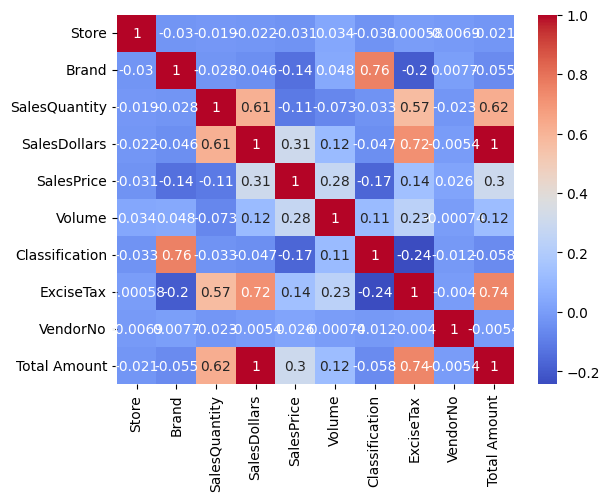

In [94]:
#heatmap of the correlation matrix
sns.heatmap(SalesFinal.corr(), cmap='coolwarm', annot=True)
plt.show()

# **Exploratory Data Analysis**

**Word Cloud Analysis**

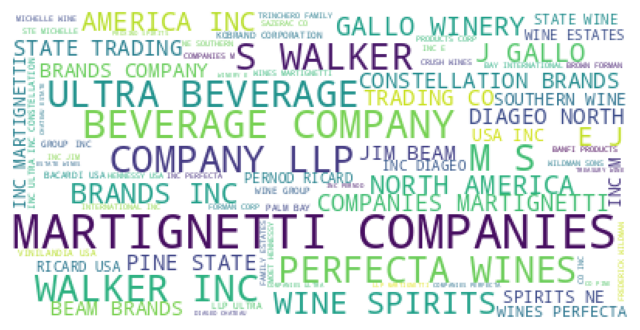

In [98]:
# Extract the VendorName column and concatenate all the values into a single string
text = ' '.join(PurchasePrice['VendorName'].astype(str).tolist())

# Create a WordCloud object and customize it
wordcloud = WordCloud(background_color='white', max_font_size=50, stopwords=STOPWORDS).generate(text)

# Set the figure size to 10 inches by 8 inches
plt.figure(figsize=(8,6))

# Generate and display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# Top Brands by Price

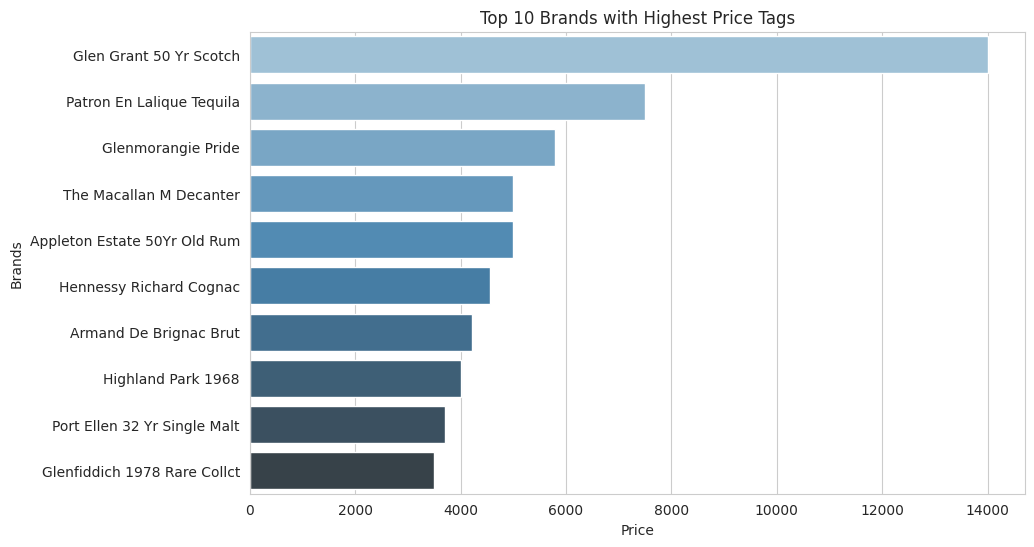

In [101]:
#top 10 brands with the highest price tags
vc = PurchasePrice.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:10]

# Create a horizontal bar plot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
ax= sns.barplot(x=vc.values, y=vc.index, palette='Blues_d')

#Set the title and axis labels
plt.title('Top 10 Brands with Highest Price Tags')
plt.xlabel('Price')
plt.ylabel('Brands')

plt.show()

**Vendor vs. Quantity Analysis**

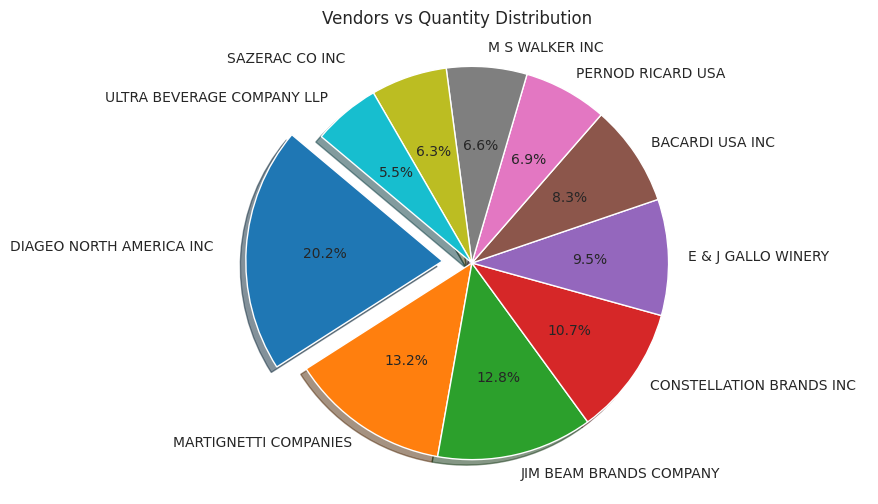

In [104]:
#Calculate the top 10 vendors and their quantities
top_vendors=Purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending=False)[:10]

#Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(top_vendors, labels=top_vendors.index,autopct='%1.1f%%', startangle=140,explode=(0.15,0,0,0,0,0,0,0,0,0),shadow=True)

#Set the title for the pie chart
plt.title('Vendors vs Quantity Distribution')

#Ensure an equal aspect ratio for a circular pie chart
plt.axis('equal')

plt.show()


**Top Brands by Purchase Price**

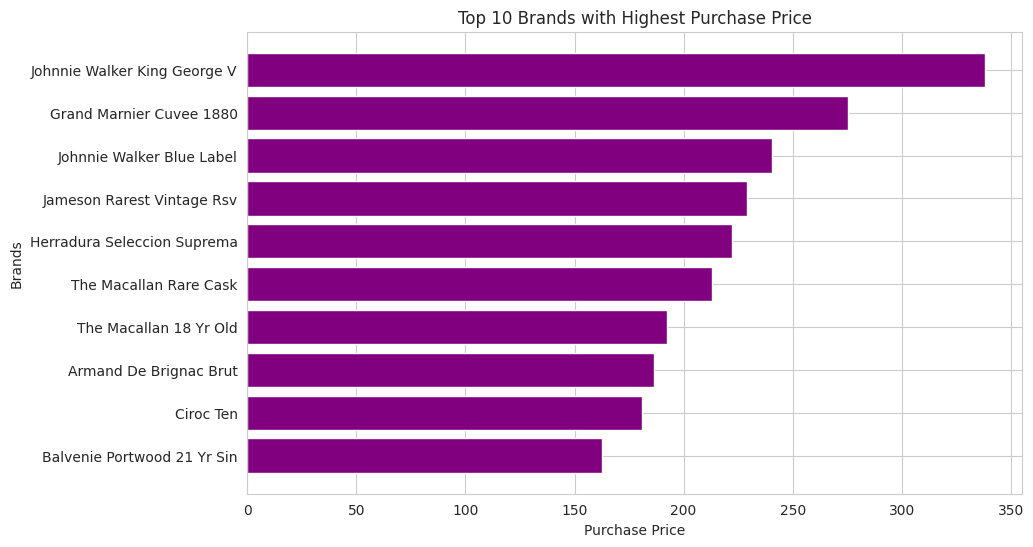

In [105]:
vc = PurchaseFinal.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending=False)[:10]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(vc.index, vc.values, color='purple')

# Add title and labels
plt.title('Top 10 Brands with Highest Purchase Price')
plt.xlabel('Purchase Price')
plt.ylabel('Brands')

# Invert the y-axis to display the highest value at the top
plt.gca().invert_yaxis()

# Display the plot
plt.show()

**Top Brands by Sale Amount**

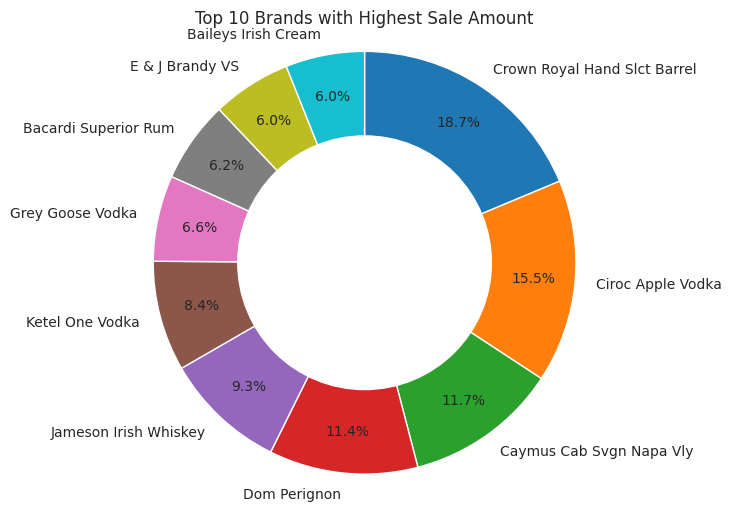

In [106]:
# Get the top 10 brands with the highest sale amount
vc = SalesFinal.groupby(['Description'])['Total Amount'].max().sort_values(ascending=False)[:10]

# Create a figure and axis
plt.figure(figsize=(6,6))
ax = plt.gca()

# Create a donut chart
wedges, texts, autotexts = ax.pie(vc.values, labels=vc.index, autopct='%1.1f%%', pctdistance=0.80, startangle=90, counterclock=False)

# Create a white circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(center_circle)

# Set aspect ratio to equal to ensure a circular chart
ax.axis('equal')

# Add a title
plt.title('Top 10 Brands with Highest Sale Amount')

# Show the plot
plt.show()